# King County Dataset Linear Regression Model 7

### Adjustments for this model:
    Start with getting rid of 'id', 'sqft_living15',	'sqft_lot15'
    Then deal with the NaN's in 'view', 'waterfront', 'yr_renovated', and 'sqft_basement'
    Change "?" in 'sqft_basement'
    Take care of outlier in bedrooms
    Change 'date' feature to a float.

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [187]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [188]:
# Change "?" in 'sqft_basement' to '0';
data.sqft_basement = data.sqft_basement.replace(to_replace = '?', value = '0')

In [189]:
# Account for missing data in 'waterfront', 'view', 'yr_renovated';
data.waterfront.fillna(value=data.waterfront.median(), inplace = True)
data.view.fillna(value=data.view.median(), inplace = True)
data.yr_renovated.fillna(value=data.yr_renovated.median(), inplace = True)
data.sqft_basement.fillna(value=data.sqft_basement.median(), inplace = True)


In [192]:
data.loc[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [193]:
# Change outlier '33' to '3' in 'bedrooms'
#data['2402100895']['bedrooms'] == 3   Didn't work.
#data.bedrooms.replace({33 : 3})   Didn't work.
data.at[15856,'bedrooms'] = 3

In [194]:
data.bedrooms.describe()

count    21597.000000
mean         3.371811
std          0.904096
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

In [195]:
data.loc[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [196]:
data.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [174]:
data.loc[data['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [175]:
data.date.describe()

count         21597
unique          372
top       6/23/2014
freq            142
Name: date, dtype: object

In [176]:
data.date.head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [200]:
import datetime as dt
data['date'] = pd.to_datetime(data['date'])
data['date']= data['date'].map(dt.datetime.toordinal)

In [202]:
data.date.describe()

count     21597.000000
mean     735535.180997
std         113.059987
min      735355.000000
25%      735436.000000
50%      735522.000000
75%      735646.000000
max      735745.000000
Name: date, dtype: float64

In [203]:
# Drop 'id' since it has no value;
X = data.drop(["id","sqft_above", "sqft_lot15", "sqft_living15"], axis=1)
y = pd.DataFrame(data, columns = ['price'])

In [204]:
# Perform a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


In [205]:
# Apply your model to the train set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [206]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [207]:
#Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 4.552746788822128e-19
Test Mean Squarred Error: 4.517460033912562e-19


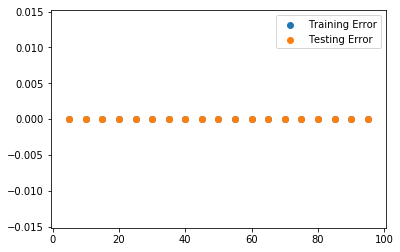

In [208]:
#Evaluate the effect of train-test split 
import random
random.seed(8)
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [209]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_5_results

-6.72228062198936e-20

In [210]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = "price ~ id+bedrooms+bathrooms+sqft_living+sqft_lot+floors+yr_renovated+view+waterfront+yr_built+zipcode+lat+long"

model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     3240.
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:10:50   Log-Likelihood:            -2.9570e+05
No. Observations:               21597   AIC:                         5.914e+05
Df Residuals:                   21583   BIC:                         5.915e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.771e+07   2.99e+06      5.926      0.000    1.19e+07    2.36e+07
id           -8.434e-07   5.11e-07     -1.649      0.099   -1.85e-06    1.59e-07
bedrooms     -5.377e+04   2076.323    -25.899      0.000   -5.78e+04   -4.97e+04
bathrooms     4.823e+04   3409.696     14.145      0.000    4.15e+04    5.49e+04
sqft_living    268.3879      2.744     97.809      0.000     263.009     273.766
sqft_lot        -0.0594      0.037     -1.596      0.111      -0.132       0.014
floors        4.101e+04   3358.277     12.213      0.000    3.44e+04    4.76e+04
yr_renovated    19.3422      4.172      4.636      0.000      11.164      27.520
view          6.477e+04   2191.988     29.550      0.000    6.05e+04    6.91e+04
waterfront    5.933e+05   1.93e+04     30.818      0.000    5.56e+05    6.31e+05
yr_built     -2079.7301     70.474    -29.511      0.000   -2217.864   -1941.596
zipcode       -776.8005     34.598    -22.452      0.000    -844.615    -708.986
lat           6.817e+05   1.12e+04     61.138      0.000     6.6e+05    7.04e+05
long         -2.466e+05   1.34e+04    -18.356      0.000   -2.73e+05    -2.2e+05
==============================================================================
Omnibus:                    15246.223   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           840079.317
Skew:                           2.807   Prob(JB):                         0.00
Kurtosis:                      33.034   Cond. No.                     1.11e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Results

###### R-squared: 0.661. The more I do the worst it gets!